# Q-Learning SARSA

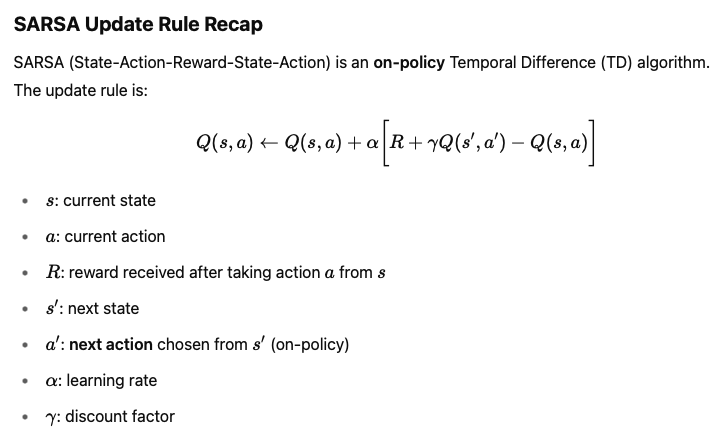

In [1]:
import numpy as np
import random
import time
import pandas as pd

In [2]:
import gymnasium as gym
from IPython.display import clear_output

# Create FrozenLake
# env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi", map_name="4x4")
# env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi", map_name="8x8")
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human", map_name="4x4")

In [3]:
# Hyperparameters:

N_STATES = 16   # the length of the 4 dimensional world
ACTIONS = ['left', 'down', 'right', 'up']     # available actions
# 0: Move left
# 1: Move down
# 2: Move right
# 3: Move up

EPSILON = 0.9   # greedy policy
ALPHA = 0.1     # learning rate
GAMMA = 0.9    # discount factor
THETA = 1e-8            # Convergence threshold


FRESH_TIME = 0.3    # refresh/pause time for one move used in time.sleep

MAX_EPISODES = 50   # maximum episodes

num_episodes = 10000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.99
epsilon = 0.2


In [4]:
# Create an initial Q table 
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

# q_table = pd.DataFrame(
#     np.zeros((state_space_size, action_space_size)),     # q_table initial values
#     columns=ACTIONS,    # actions's name
# )
    
print(q_table)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
# This is our Policy (AKA Model) (AKA Q Table)
def choose_action(env, state, q_table):

    # Exploration-exploitation trade-off
    exploration_rate_threshold = random.uniform(0, 1)
    if exploration_rate_threshold > epsilon:
        action = np.argmax(q_table[state,:])
    else:
        action = env.action_space.sample()


    return action

In [6]:
def q_learning_SARSA(env, q_table):
    for episode in range(num_episodes):
        # Fix reset() usage
        S, info = env.reset()
       
        for step in range(max_steps_per_episode):
  
            A = choose_action(env, S, q_table)
            
            S_, R, terminated, truncated, info = env.step(A)
            
            # q_predict = q_table.loc[S, A]
            q_predict = q_table[S, A]
            
            if S_ != terminated and S_ != truncated:
                A_ = choose_action(env, S_, q_table)
                q_target = R + GAMMA * q_table[S_, A_] - q_predict

            else:
                q_target = R     # next state is terminal
                # is_terminated = True    # terminate this episode

            q_table[S, A] += ALPHA * q_target  # update
            
            S = S_  # move to next state

            
            # # #Print info
            # print(f"Episode {episode} - Step {step} Given Action {A}, next state {S_}")
            

            # the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15.
            if R and S_==15:
                print("You Won!!!")
                print(f"Episode {episode + 1} ended with reward: {R}")                
                break
            
            #Check for Termination
            if terminated or truncated:
                print("GAME OVER --- Terminated!!!")
                print(f"Episode {episode + 1} ended with reward: {R}")
                break

    env.close()
    
    return q_table

In [7]:
q_table = q_learning_SARSA(env, q_table)

/Users/oysterable/delete/ReinforcementLearning/rlvenv/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


GAME OVER --- Terminated!!!
Episode 1 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 2 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 3 ended with reward: 0.0


KeyboardInterrupt: 

In [ ]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)


In [ ]:
def testModel(env, q_table):
    #Deploy Code
    actionLog = []
    for episode in range(1):
        state, info = env.reset()  # Fix: Unpack both state and info

        for step in range(max_steps_per_episode):
            clear_output(wait=True)
            env.render()
            

            action = np.argmax(q_table[state,:])
            actionLog.append(action)
            # Fix: Handle all five return values from step()
            new_state, reward, terminated, truncated, info = env.step(action)
            
            # time.sleep(0.3)

            # the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15.
            if reward and new_state==15:
                print("You Won!!!")
                env.close()
                break
            
            #Check for Termination
            if terminated or truncated:
                print("GAME OVER --- Terminated!!!")
                env.close()
                break            

            state = new_state

    env.close()
    
    return actionLog


In [ ]:
# Create FrozenLake
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human", map_name="4x4")
# env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human", map_name="8x8")

actionLog = testModel(env, q_table)


In [ ]:
len(actionLog)